# **Esercizio Machine Learning**

Utilizzando il dataset "Diabetes" disponibile in scikit-learn, sviluppa un modello di regressione lineare per predire la progressione della malattia del diabete
basandoti sulle dieci misurazioni cliniche fornite.


1. Carica il dataset "Diabetes" utilizzando sklearn.datasets.load_diabetes().

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data 
y = data.target

2. Esplora i dati per comprendere le caratteristiche disponibili e la variabile target.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


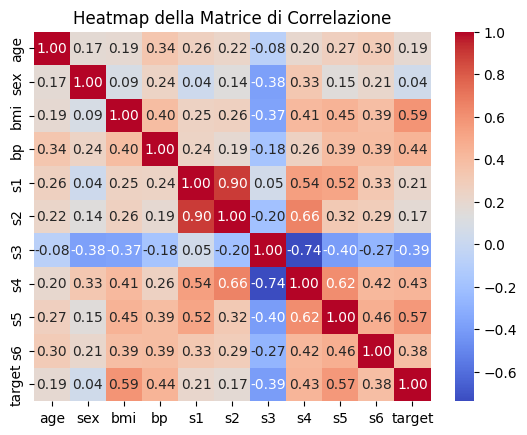

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap della Matrice di Correlazione')
plt.show()

3. Suddividi il dataset in set di training e test.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

4. Crea un modello di regressione lineare utilizzando LinearRegression di scikitlearn.

In [16]:
from sklearn.linear_model import LinearRegression

**Linear Regression**

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

5. Valuta le prestazioni del modello sui dati di test utilizzando metriche appropriate come l'Errore Quadratico Medio (MSE) e il Coefficiente di Determinazione (R²).


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2900.19
R^2 Score: 0.45


6. Analizza i risultati e discuti l'efficacia del modello.

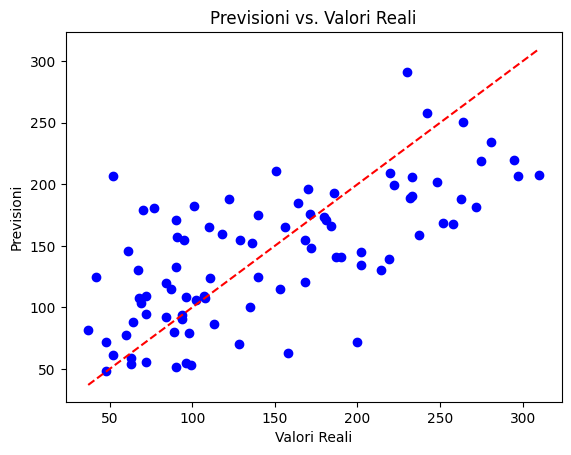

In [31]:
plt.scatter(y_test, y_pred, color='blue', label='Previsioni')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linea di Identità')
plt.xlabel('Valori Reali')
plt.ylabel('Previsioni')
plt.title('Previsioni vs. Valori Reali')
plt.show()